**Step 1: Load the Dataset 📂**

We will extract the dataset from the ZIP file, load the relevant CSV file into a DataFrame, and explore its structure. This step helps us understand the dataset before proceeding further.

In [4]:
import pandas as pd
import zipfile

def load_and_explore_dataset(zip_file_path, csv_file_name):
    """
    Extract and load a dataset from a ZIP file, then explore its structure.

    Args:
    zip_file_path (str): Path to the ZIP file.
    csv_file_name (str): Name of the CSV file inside the ZIP.

    Returns:
    pd.DataFrame: The loaded dataset.
    """
    # Extract the ZIP file
    print(f"Extracting '{zip_file_path}'...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("./data")
    print(f"Extraction complete! Files are located in './data/'\n")

    # Load the specified CSV file
    file_path = f"./data/{csv_file_name}"
    print(f"Loading '{csv_file_name}'...\n")
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: The file '{csv_file_name}' was not found in the extracted folder.")
        return None

    # Display basic information
    print("Dataset Information:")
    print(data.info())
    print("\nFirst Five Rows of Data:")
    print(data.head())

    return data


# Call the function with the paths to the ZIP and CSV files
zip_file_path = "./Health Care Analytics - 2.zip"  # Path to your ZIP file
csv_file_name = "train.csv"  # Replace with the file you want to load (e.g., "test.csv", "train.csv", etc.)

data = load_and_explore_dataset(zip_file_path, csv_file_name)


Extracting './Health Care Analytics - 2.zip'...
Extraction complete! Files are located in './data/'

Loading 'train.csv'...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade              

Here we will do the Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(data):
    """
    Preprocess the dataset by handling missing values, encoding categorical variables,
    and scaling numerical features.

    Args:
    data (pd.DataFrame): The raw dataset.

    Returns:
    pd.DataFrame: The preprocessed dataset.
    """
    # Check for missing values
    print("\nChecking for missing values before handling...")
    print(data.isnull().sum())

    # Fill missing values
    for col in data.columns:
        if data[col].dtype == 'object':  # Categorical columns
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:  # Numeric columns
            data[col].fillna(data[col].mean(), inplace=True)

    print("\nChecking for missing values after handling...")
    print(data.isnull().sum())

    # Encode categorical columns
    print("\nEncoding categorical variables...")
    label_encoders = {}
    for col in data.select_dtypes(include=['object']).columns:
        print(f"Encoding {col}...")
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le  # Store encoder for future use

    # Scale numeric columns
    print("\nScaling numeric variables...")
    scaler = StandardScaler()
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    # Display processed dataset info
    print("\nProcessed Dataset Information:")
    print(data.info())
    print("\nFirst Five Rows of Processed Data:")
    print(data.head())

    return data


# Call the preprocessing function
processed_data = preprocess_data(data)



Checking for missing values before handling...
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


<ipython-input-5-2ab6e1650aa0>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-5-2ab6e1650aa0>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Checking for missing values after handling...
case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

Encoding categorical variables...
Encoding Hospital_type_code...
Encoding Hospital_region_code...
Encoding Department...
Encoding Ward_Type...
Encoding Ward_Facility_Code...
Encoding Type of Admission...
Encoding Severity of Illness...
E

Now we Will Do Exploratory Data Analysis

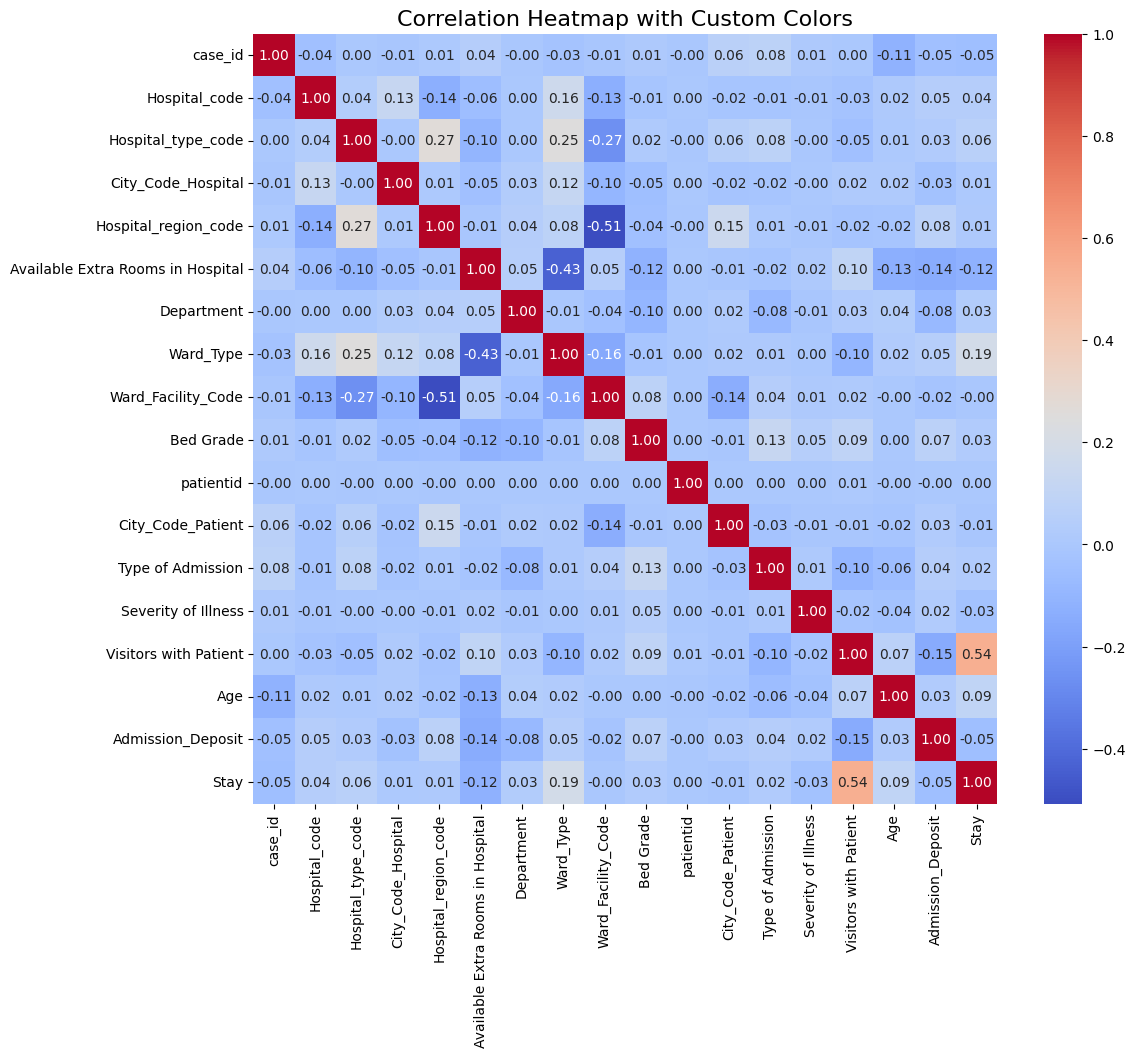

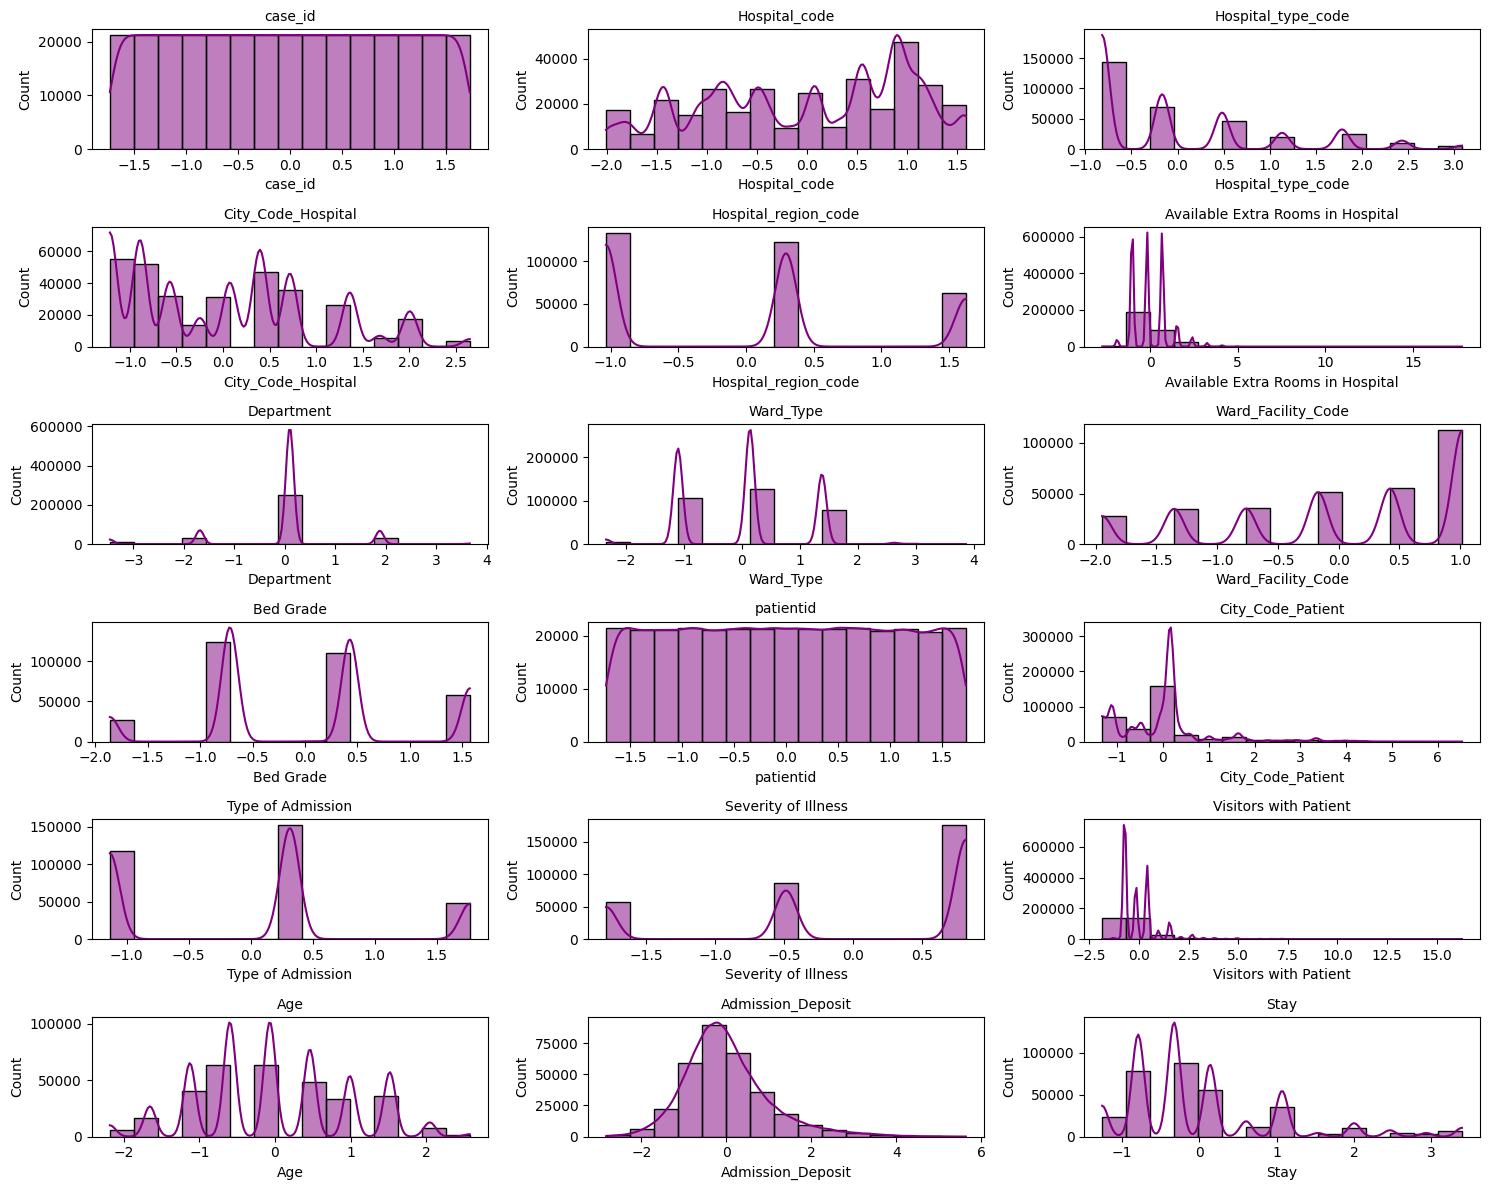

In [7]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(processed_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap with Custom Colors', fontsize=16)
plt.savefig("custom_heatmap.png", dpi=300)
plt.show()

# Updated distribution plots with a different style
plt.figure(figsize=(15, 12))
for i, column in enumerate(processed_data.columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(processed_data[column], kde=True, color="purple", bins=15)
    plt.title(column, fontsize=10)
    plt.tight_layout()

plt.savefig("custom_distributions.png", dpi=300)
plt.show()


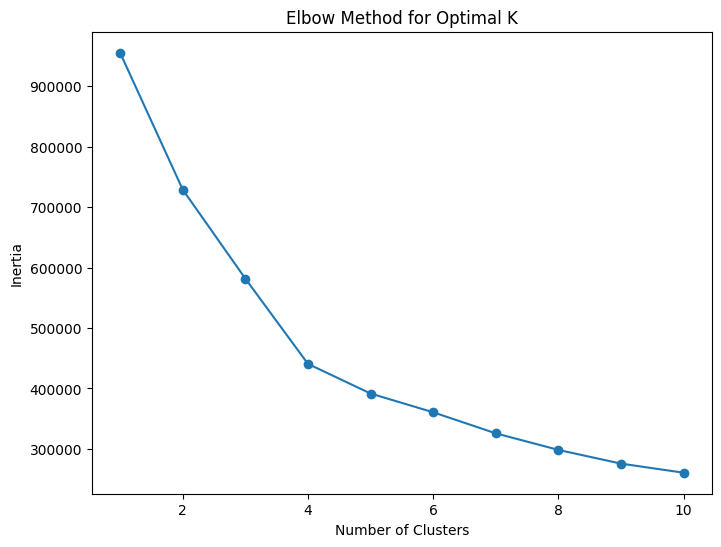

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select key features for clustering
clustering_features = processed_data[['Age', 'Admission_Deposit', 'Visitors with Patient']]

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
optimal_clusters = 4  # Example value; update based on Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
processed_data['Cluster'] = kmeans.fit_predict(clustering_features)

print("Clustering completed. Data now contains a 'Cluster' column.")
print(processed_data.head())


Clustering completed. Data now contains a 'Cluster' column.
    case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0 -1.732045      -1.195176            0.483919           -0.571055   
1 -1.732034      -1.890124            0.483919            0.073580   
2 -1.732024      -0.963527            1.786248           -1.215691   
3 -1.732013       0.889668           -0.167246           -0.893373   
4 -1.732002       0.889668           -0.167246           -0.893373   

   Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0              1.623734                          -0.169177    1.881928   
1              1.623734                          -1.025217    1.881928   
2             -1.033982                          -1.025217   -1.681582   
3              0.294876                          -1.025217    1.881928   
4              0.294876                          -1.025217    1.881928   

   Ward_Type  Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient 

Cluster Analysis and Visualization

Cluster Characteristics:
           case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
Cluster                                                                    
0       -0.023283       0.063625            0.014367           -0.047197   
1        0.069757      -0.022237            0.001413           -0.014273   
2       -0.087468       0.010744            0.022187            0.025018   
3       -0.014680      -0.031608           -0.101618            0.064651   

         Hospital_region_code  Available Extra Rooms in Hospital  Department  \
Cluster                                                                        
0                    0.095133                          -0.165205   -0.173243   
1                    0.004124                           0.179644    0.007926   
2                   -0.027419                          -0.210093    0.059061   
3                   -0.086307                           0.084675    0.053790   

         Ward_Type  Ward_Facility_Co

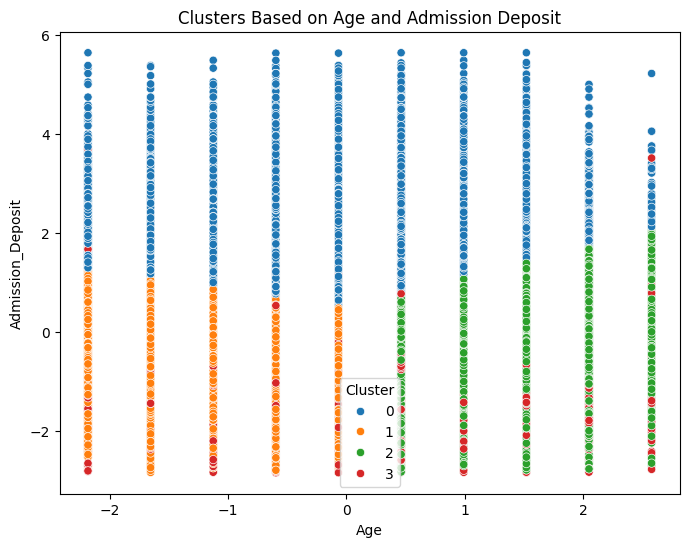

In [10]:
import seaborn as sns

# Cluster characteristics
cluster_analysis = processed_data.groupby('Cluster').mean()
print("Cluster Characteristics:\n", cluster_analysis)

# Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=processed_data, x='Age', y='Admission_Deposit', hue='Cluster', palette='tab10')
plt.title('Clusters Based on Age and Admission Deposit')
plt.show()


Now lets Analyze the Clusters

Cluster Characteristics:
           case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
Cluster                                                                    
0       -0.023283       0.063625            0.014367           -0.047197   
1        0.069757      -0.022237            0.001413           -0.014273   
2       -0.087468       0.010744            0.022187            0.025018   
3       -0.014680      -0.031608           -0.101618            0.064651   

         Hospital_region_code  Available Extra Rooms in Hospital  Department  \
Cluster                                                                        
0                    0.095133                          -0.165205   -0.173243   
1                    0.004124                           0.179644    0.007926   
2                   -0.027419                          -0.210093    0.059061   
3                   -0.086307                           0.084675    0.053790   

         Ward_Type  Ward_Facility_Co

<ipython-input-11-3ff2f2cfc90e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=processed_data, x='Cluster', palette='viridis')


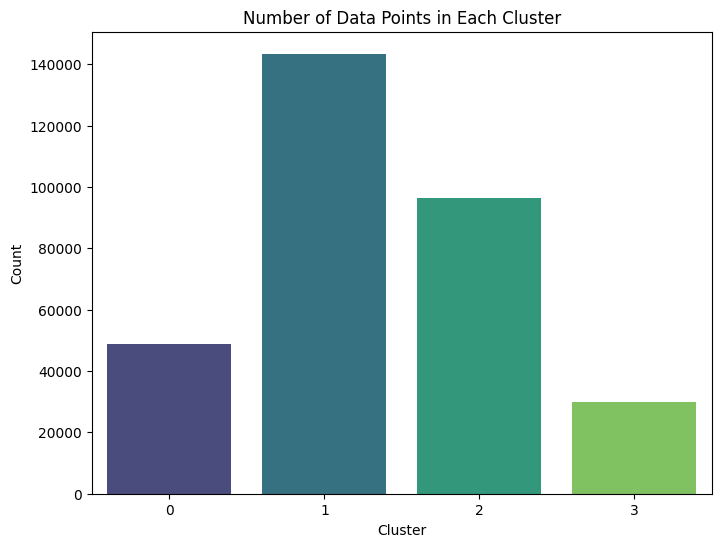

In [11]:
# Analyzing Cluster Characteristics
cluster_summary = processed_data.groupby('Cluster').mean()
print("Cluster Characteristics:\n", cluster_summary)

# Visualizing Cluster Distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=processed_data, x='Cluster', palette='viridis')
plt.title("Number of Data Points in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Lets Jump to another Chapter: Regression Analysis

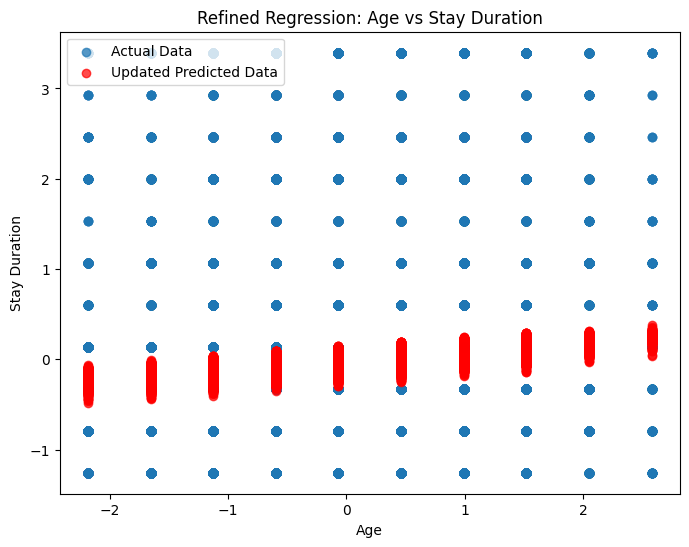

Updated Future Predictions for Stay Duration:
 [[-106.09892667]
 [-267.63568991]
 [-429.17245315]]


In [15]:
# Predicting on Scaled Test Data
y_pred_scaled = ridge_model.predict(scaler_X.transform(X_test))

# Reshape y_pred_scaled to 2D before applying inverse_transform
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Visualizing Updated Predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Age'], y_test, label="Actual Data", alpha=0.7)
plt.scatter(X_test['Age'], y_pred, color='red', label="Predicted Data", alpha=0.7)
plt.title("Refined Regression: Age vs Stay Duration")
plt.xlabel("Age")
plt.ylabel("Stay Duration")
plt.legend()
plt.show()

# Future Predictions with Updated Model
future_scaled = scaler_X.transform(future_data)
future_predictions_scaled = ridge_model.predict(future_scaled)

# Reshape future_predictions_scaled before inverse_transform
future_predictions = scaler_y.inverse_transform(future_predictions_scaled.reshape(-1, 1))

print("Updated Future Predictions for Stay Duration:\n", future_predictions)


Future Predictions

In [13]:
# Example Future Predictions
future_data = pd.DataFrame({'Age': [30, 50, 70], 'Admission_Deposit': [2000, 5000, 8000]})
future_predictions = model.predict(future_data)

print("Future Predictions for Stay Duration:\n", future_predictions)


Future Predictions for Stay Duration:
 [-108.4598829  -273.55603884 -438.65219479]
